# Problem Analysis Workshop 5

**Team Members:**
1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

#  Term Project - Space Mission Dataset Extension
We use the Global Space Mission Launches dataset. This data provides historical records of launch events, locations, companies, rocket types, and success status. According to the dataset, we implement a non-linear regression and logistic regression to analyze the X independent variable and the y dependent variable, and explore/validate its relevance to the term project.

## Step 1: Load dataset

In [1]:
# Import library
import pandas as pd

# Load a CSV file into a DataFrame
df = pd.read_csv('./data/Space_Corrected.csv')

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Step 2: Clean dataset and check missing values

In [2]:
# Check each column type
print(df.info())

# Check missing values
print("\nCheck missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB
None

Check missing values:
 Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64


In [3]:
# Define a class for cleaning the space mission dataset
class DataCleaner:
    def __init__(self, df):
        self.df = df

    def clean(self):
        df = self.df.copy()
        df.columns = df.columns.str.strip()

        # Remove unnecessary fields
        df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, errors='ignore')
        
        # Remove missing values
        df = df.dropna(subset=['Status Mission', 'Rocket'])

        # Convert “Rocket” column to numeric
        df['Rocket'] = pd.to_numeric(df['Rocket'], errors='coerce')

        # Convert 'Datum' column to datetime format
        df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

        # Label unification and dualization
        df['Status Mission'] = df['Status Mission'].str.strip().str.capitalize()
        df['Mission_Success_Binary'] = df['Status Mission'].map(lambda x: 1 if x == 'Success' else 0)
        
        # Label Encoding
        categorical_cols = ['Company Name', 'Location', 'Detail']
        for c in categorical_cols:
            df[c] = df[c].astype('category')

        # Handling outliers
        df = df[df['Rocket'] >= 0]
        df = df[df['Datum'].dt.year >= 1957]

        # Remove duplicate data
        df = df.drop_duplicates()

        return df

# Create an instance of DataCleaner and clean the DataFrame 
df_clean = DataCleaner(df).clean()
df_clean.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Mission_Success_Binary
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,1
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,1


In [4]:
# Check each column type
print(df_clean.info())

# Check missing values
print("\nCheck missing values:\n", df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Company Name            942 non-null    category           
 1   Location                942 non-null    category           
 2   Datum                   942 non-null    datetime64[ns, UTC]
 3   Detail                  942 non-null    category           
 4   Status Rocket           942 non-null    object             
 5   Rocket                  942 non-null    float64            
 6   Status Mission          942 non-null    object             
 7   Mission_Success_Binary  942 non-null    int64              
dtypes: category(3), datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 90.9+ KB
None

Check missing values:
 Company Name              0
Location                  0
Datum                     0
Detail                    0
Status Ro

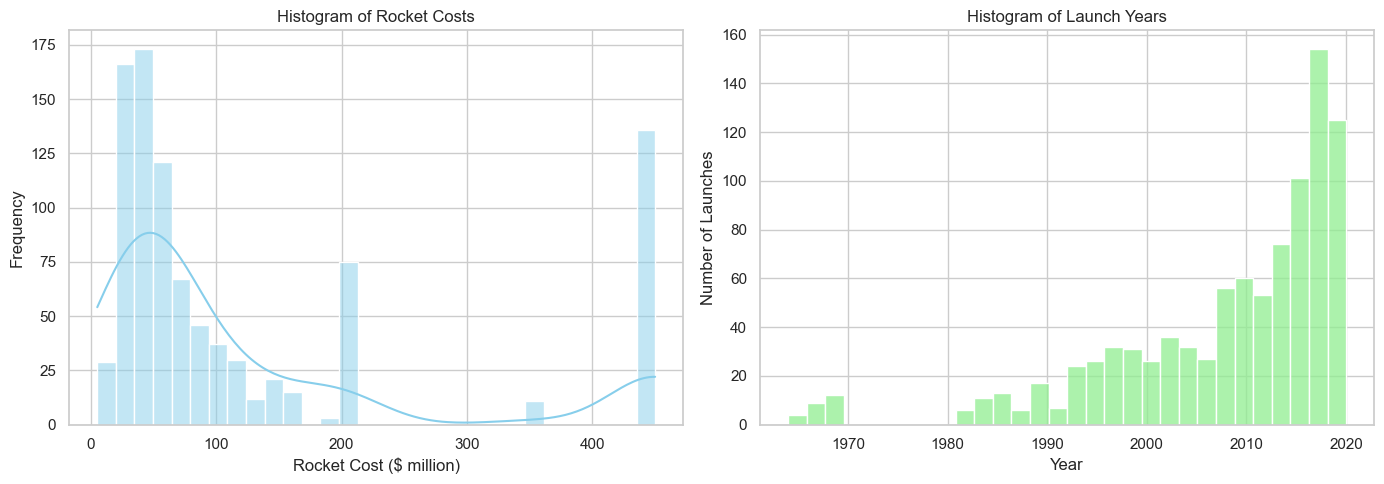

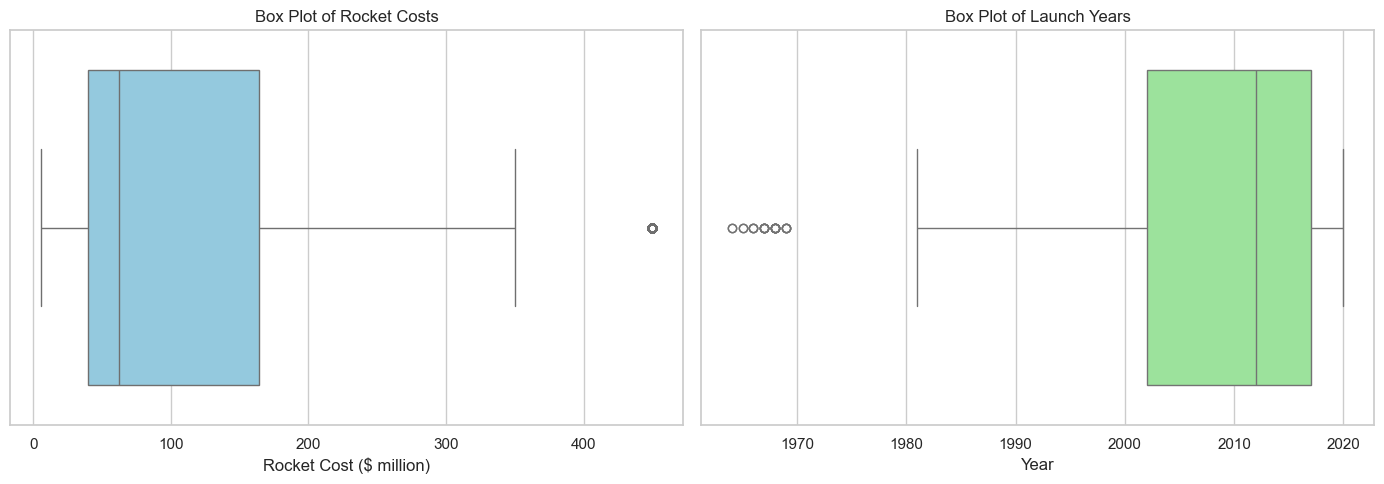

In [5]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extract 'Year' from 'Datum' for plotting
df_clean['Year'] = df_clean['Datum'].dt.year

# Set Seaborn style
sns.set(style="whitegrid")

# -------- HISTOGRAMS --------
plt.figure(figsize=(14, 5))

# Histogram for Rocket cost
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Rocket'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Rocket Costs')
plt.xlabel('Rocket Cost ($ million)')
plt.ylabel('Frequency')

# Histogram for Year
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Year'], bins=30, kde=False, color='lightgreen')
plt.title('Histogram of Launch Years')
plt.xlabel('Year')
plt.ylabel('Number of Launches')

plt.tight_layout()
plt.show()


# -------- BOX PLOTS --------
plt.figure(figsize=(14, 5))

# Box plot for Rocket cost
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['Rocket'], color='skyblue')
plt.title('Box Plot of Rocket Costs')
plt.xlabel('Rocket Cost ($ million)')

# Box plot for Year
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Year'], color='lightgreen')
plt.title('Box Plot of Launch Years')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


## Step 3: Implementing a Non-linear Regression
Comparing Polynomial Regression Models to Analyze Rocket Mission Cost Trends. We applied non-linear regression using polynomial models of degree 2 and degree 3 to implement non-linear cost dynamics change.

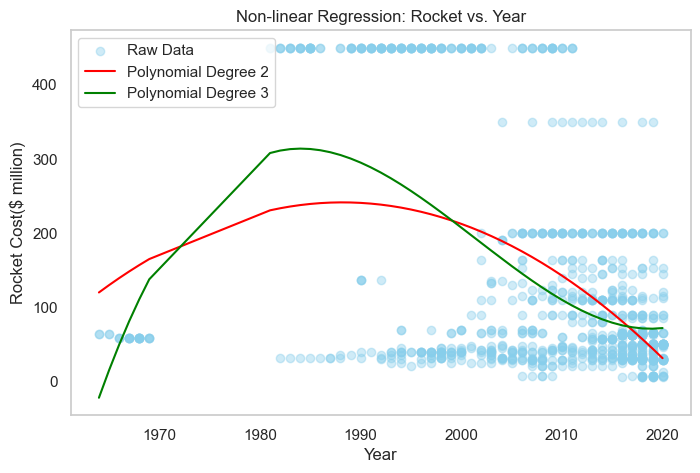

In [6]:
# Import libraries and function
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define a class for executing the non-linear regression model
class ExecuteModel:
    def __init__(self, X, y, degree=2):
        self.X = X
        self.y = y
        self.degree = degree
        self.poly = None
        self.X_poly = None
        self.model = None
        self.y_pred = None

    def transform_features(self):
        self.poly = PolynomialFeatures(degree=self.degree) # Feature transformation
        self.X_poly = self.poly.fit_transform(self.X) # Fit the model
        return self.X_poly
    
    def non_lr(self):
        self.model = LinearRegression().fit(self.X_poly, self.y) # Create the linear regression model
        self.y_pred = self.model.predict(self.X_poly) # Fit the model
        return self.model

# Define independent variable X and dependent variable y
df_clean['Year'] = df_clean['Datum'].dt.year # Extracting the year from the 'Datum' column
X = df_clean[['Year']]
y = df_clean['Rocket'] # The Rocket column is the cost of the mission(unit:$ million). It is continuous data.

# Feature Transformation and Regression Modeling
# For polynomial degree 2
analysis2 = ExecuteModel(X, y, degree=2)
X_poly2 = analysis2.transform_features()
model2 = analysis2.non_lr()

# For polynomial degree 3
analysis3 = ExecuteModel(X, y, degree=3)
X_poly3 = analysis3.transform_features()
model3 = analysis3.non_lr()

# Display the non-linear regression
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='skyblue', label='Raw Data', alpha=0.4)
plt.plot(X, analysis2.y_pred, color='red', label='Polynomial Degree 2')
plt.plot(X, analysis3.y_pred, color='green', label='Polynomial Degree 3')
plt.xlabel('Year')
plt.ylabel('Rocket Cost($ million)')
plt.title('Non-linear Regression: Rocket vs. Year')
plt.legend()
plt.grid()
plt.show()

From the Non-linear Regression:
- Scatter plot: raw data of rocket mission costs (in million USD).
- Both curves generally follow the same visual trend: a rise in mission cost in the early decades, flattening out in the middle period, and declining in the most recent years.
- Degree-2 curve: shows a smooth, parabolic trajectory. It captures the general trend well, acting as a simplified high-level model of how rocket costs have evolved.
- Degree-3 curve: adds complexity. Shows a sharper rise early on, a slight peak between the 1980s–1990s, and a more noticeable drop since the 2000s. The cubic term provides more flexibility to capture subtle turning points in rocket cost dynamics.

## 500-word discussion on its relevance to the term project
### Insights from the Visualized Models

The scatter plot presents raw data points showing mission costs plotted against launch years, revealing substantial variability across decades. Overlaying the polynomial regression fits helps us interpret the underlying trends more systematically.

- The **degree 2 polynomial regression (red line)** forms a smooth parabolic curve. It models a rise in costs during the earlier decades of space exploration, possibly linked to the initial technological developments and intense governmental investment during the Cold War space race. Following the peak, the curve suggests a decline in costs, reflecting advances in technology, increasing commercialization, and cost-saving innovations.

- The **degree 3 polynomial regression (green line)** introduces more curvature and flexibility. It captures subtler fluctuations, such as sharper rises or dips around particular periods—for example, a pronounced peak in the late 20th century and a steeper cost drop in the 21st century. This reflects real-world phenomena like the expensive Shuttle era followed by cost reductions driven by private companies innovating reusable rockets and rideshare launch services.

### Model Comparison and Implications

While both models identify a general "rise-peak-fall" pattern in launch costs, the cubic model better captures nuanced inflection points in the data, providing a closer fit to certain historical cost shifts. However, this flexibility comes with potential risks of overfitting, particularly if the available data points or underlying processes do not warrant overly complex models. The quadratic model, being simpler, is more interpretable and provides a good high-level summary of the long-term trend.

Our comparison highlights an essential trade-off in data modeling and analysis: balancing model complexity with interpretability and generalizability. In the context of this project, it's crucial to choose the degree of polynomial that not only fits the data well but also aligns with known space industry developments and the goals of our analysis.

### Relevance to the Term Project

This non-linear regression exploration is highly relevant to our term project as it:

1. **Provides Historical Context:** By modeling the mission cost trends over time, we understand how technological progress, economic changes, policy shifts, and market dynamics shaped the cost structure of space missions.
2. **Supports Strategic Forecasting:** The fitted models allow us to project future costs under current trends of technological innovation and commercialization, such as reusable rockets pushing prices further down.
3. **Facilitates Critical Evaluation:** Comparing polynomial degrees encourages critical thinking about model choice, validation, and the balance of fit versus complexity, which are fundamental concepts in data science and engineering analyses.
4. **Enriches Discussion:** The analysis offers a rich narrative linking data patterns to real-world events and industry transitions, deepening insights into space mission economics.
5. **Prepares for Further Analyses:** Validating and comparing these regression models lays the groundwork for integrating additional predictors (e.g., payload mass, company, mission type) or employing other advanced machine learning approaches.

### Conclusion

The application and visual comparison of degree 2 and degree 3 polynomial regression models reveal important aspects of rocket mission cost evolution, emphasizing non-linear and multi-phase developments rather than simple linear growth or decline. This non-linear approach enriches our understanding of space mission economics and adds robustness, nuance, and explanatory power to our term project's data-driven narrative.

By consciously weighing model complexity and interpretability, we ensure the analytical methods used are well matched to the problem at hand, enhancing the scientific rigor and practical relevance of the project’s findings.

## Step 4: Implementing a Logistic Regression
Through logistic regression analysis, using the 'Year', 'Rocket', 'Company Name', and 'Location' features, explore and validate factors influencing 'Mission_Success_Binary'.

Accuracy: 0.6825396825396826

Confusion Matrix:
 [[  7   3]
 [ 57 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.70      0.19        10
           1       0.98      0.68      0.80       179

    accuracy                           0.68       189
   macro avg       0.54      0.69      0.50       189
weighted avg       0.93      0.68      0.77       189



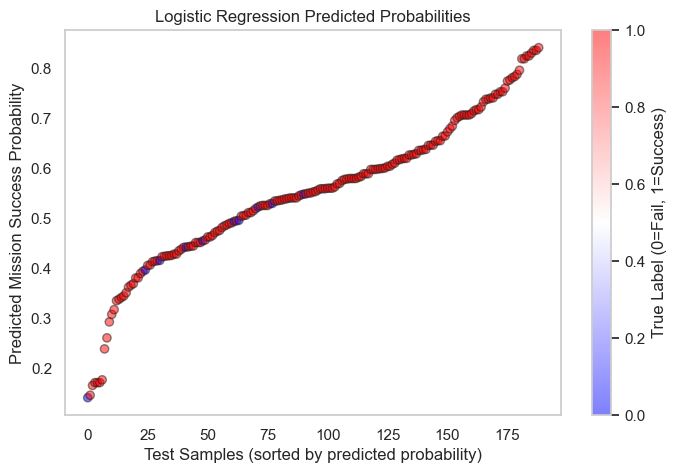

In [7]:
# Import libraries and function
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

# Define a class for executing the logistic regression model
class ExecuteLRModel:
    def __init__(self, df, X, y):
        self.df = df
        self.X = X
        self.y = y
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.y_pred = None
        self.model = None
        self.pipeline = None
        
    def lr_model(self):
        # Split the data into 80% training and 20% testing sets
        # stratify=self.y to ensure class distribution is similar in train/test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42, stratify=self.y)
        
        # Create a pipeline with scaling and logistic regression
        # max_iter=1000 to LogisticRegression for better convergence
        self.pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))
        
        # Fit the pipeline
        self.pipeline.fit(self.X_train, self.y_train)

        # Predict the test set
        self.y_pred = self.pipeline.predict(self.X_test)

        return self.pipeline
        
    def results(self):
        print("Accuracy:", accuracy_score(self.y_test, self.y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(self.y_test, self.y_pred))
        print("\nClassification Report:\n", classification_report(self.y_test, self.y_pred))
    
    def plot_lr(self):
        # The probability of the positive class (index 1)
        probs = self.pipeline.predict_proba(self.X_test)[:, 1]
        
        # Sort the test samples by their predicted probability for better visualization
        sorted_indices = np.argsort(probs)
        sorted_probs = probs[sorted_indices]
        
        # Ensure y_test is converted to a numpy array for proper indexing after sorting
        sorted_true = np.array(self.y_test)[sorted_indices]
        
        # Display the logistic regression
        plt.figure(figsize=(8,5))
        plt.scatter(range(len(probs)), sorted_probs, c=sorted_true, cmap='bwr', edgecolor='k', alpha=0.5)
        plt.colorbar(label='True Label (0=Fail, 1=Success)') # Color bar for true labels
        plt.xlabel('Test Samples (sorted by predicted probability)')
        plt.ylabel('Predicted Mission Success Probability')
        plt.title('Logistic Regression Predicted Probabilities')
        plt.grid()
        plt.show()


# Encode categorical variables and scale numerical features
le = LabelEncoder()
df_clean['Company Name'] = le.fit_transform(df_clean['Company Name'])
df_clean['Location'] = le.fit_transform(df_clean['Location'])

# Define independent variable X and dependent variable y
X = df_clean[['Year', 'Rocket', 'Company Name', 'Location']]
y = df_clean['Mission_Success_Binary']

# Create logistic regression model
logreg_model = ExecuteLRModel(df_clean, X, y)
logreg_model.lr_model()

# Display results
logreg_model.results()

# Display the logistic regression
logreg_model.plot_lr()

- **Overall Accuracy is 68.25%**

- **Confusion Matrix:**
    - The model correctly identified **7 out of 10** actual failures (True Negatives).
    - It incorrectly predicted **57** successful missions as failures (False Negatives).
    - It correctly predicted **122** successful missions (True Positives).
    - It incorrectly predicted **3** failed missions as successes (False Positives).

- **Classification Report:**
    - The **precision for success (class 1) is 0.98**, which means that when the model predicts a mission will succeed, it is almost always correct.
    - The **precision for failure (class 0) is only 0.11**, indicating that the model is very poor at correctly identifying failures.
    - The **recall for failure (class 0) is 0.70**, meaning it correctly identifies 70% of all actual failures.

- **Logistic Regression Predicted Probabilities chart**
    - Shows the predicted probability of success for each test sample, sorted from lowest to highest. 
    - Most of the high-probability predictions are successes (red points), and there's a considerable overlap. The model incorrectly assigns high probabilities to some failures and low probabilities to some successes, confirming its difficulty in making accurate distinctions between the two classes.

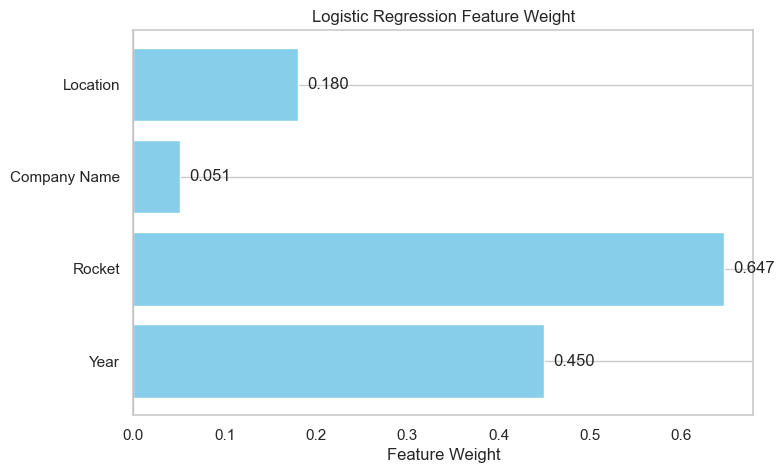

In [8]:
def plot_feature_coefficients(model_pipeline, feature_names):
    # Get the logistic regression object and its coefficients
    lr = model_pipeline.named_steps['logisticregression']
    coefs = lr.coef_[0]

    plt.figure(figsize=(8,5))
    bars = plt.barh(feature_names, coefs, color='skyblue')
    plt.xlabel('Feature Weight')
    plt.title('Logistic Regression Feature Weight')
    plt.grid(axis='x')
    plt.axvline(x=0, color='grey', linewidth=0.8)

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01 if width > 0 else width - 0.01, bar.get_y() + bar.get_height()/2,
                 f'{width:.3f}', va='center',ha='left' if width > 0 else 'right')

    plt.show()

# Usage demonstration
feature_names = logreg_model.X_train.columns
plot_feature_coefficients(logreg_model.pipeline, feature_names)

- From Logistic Regression Feature Weight,
    - The **Rocket** feature has the highest weight at **0.647**, indicating it is the most significant predictor of the outcome.
    - The **Year** feature is the next most important, with a weight of **0.450**.
    - The **Location** feature has a smaller weight of **0.180**.
    - The **Company Name** feature has the lowest weight at **0.051**, suggesting it has the least influence on the model's predictions.

## 500-word discussion on its relevance to the term project
### Insights from the Visualized Models
- The visualizations reveal that the logistic regression model struggles to clearly separate mission successes and failures, especially in the mid-range probabilities, as shown by overlapping red and blue points. The model performs poorly on failure prediction, supported by the low precision for class 0. 
- The feature weight chart highlights rocket cost and launch year as the most influential factors driving mission success, with rocket cost having the highest positive impact (**weight = 0.647**), followed by launch year (**weight = 0.450**). Company and location also contribute, but less significantly. These insights help identify key variables influencing mission outcomes.

### Model Comparison and Implications
A simple linear regression is unsuitable for this binary classification task, as it fails to constrain predictions between 0 and 1. Logistic regression appropriately models success/failure using a sigmoid function. While the model’s overall accuracy is **68.25%**, it has high precision (**0.98**) for predicting successes but performs poorly on failures, with low precision (**0.11**) despite high recall (**0.70**). The confusion matrix shows many false negatives. Although `class_weight='balanced'` was used, the model still struggles with the minority class, indicating class imbalance or model limitations remain an issue.

### Relevance to the Term Project
For the term project, which aims to predict mission success, logistic regression is highly relevant. It serves as a strong **baseline model** for binary classification tasks. The insights gained from this model, particularly the feature weights, can guide further feature engineering and model selection. For instance, the high importance of "Rocket" and "Year" suggests that a more nuanced representation of these features could improve the model. Perhaps using a more granular categorization for rockets or a non-linear transformation of the year feature could yield better results.

The model's current limitations, especially its poor performance on predicting failures, are also a critical finding for the project. This highlights the need to explore more advanced models, such as decision trees, random forests, or gradient boosting, which might be better at handling the class imbalance and complex relationships in the data. The logistic regression results provide a clear benchmark against which these more sophisticated models can be measured. It tells us that a simple model struggles with this particular problem, guiding us to explore more complex approaches.

### Conclusion

The logistic regression model provides a valuable first step in analyzing the factors influencing mission success. The feature weight chart clearly identifies the **rocket** and **year** as the most significant predictors. However, the performance metrics and probability plot reveal that the model struggles to accurately predict mission failures. This suggests that while logistic regression is a relevant and logical choice for a binary classification problem, its performance here is a cautionary tale. For the term project to be successful, this model's limitations must be acknowledged, and future efforts should focus on exploring more robust models and techniques to improve the prediction of the minority class (failures), ultimately providing a more reliable and useful predictive tool.